In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install shap

In [3]:
import shap
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Thesis v3/2 Model/vgg16.keras')

In [5]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_52 (Conv1D)              │ (None, 51, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 51, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_64 (Activation)      │ (None, 51, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_53 (Conv1D)              │ (None, 51, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 51, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_65 (Activation)      │ (None, 51, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_20 (MaxPooling1D) │ (None, 25, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_54 (Conv1D)              │ (None, 25, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 25, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_66 (Activation)      │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_55 (Conv1D)              │ (None, 25, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_63          │ (None, 25, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_67 (Activation)      │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_21 (MaxPooling1D) │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_56 (Conv1D)              │ (None, 12, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_64          │ (None, 12, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_68 (Activation)      │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_57 (Conv1D)              │ (None, 12, 256)        │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_65          │ (None, 12, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_69 (Activation)      │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_58 (Conv1D)              │ (None, 12, 256)        │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_66          │ (None, 12, 256)        │         1,02

 Total params: 71,493,576 (272.73 MB)

 Trainable params: 23,822,914 (90.88 MB)

 Non-trainable params: 24,832 (97.00 KB)

 Optimizer params: 47,645,830 (181.75 MB)

In [6]:
import pandas as pd

df_train = pd.read_csv("/content/drive/MyDrive/Thesis v3/1 Extracted Features/df_train.csv")
#df_train

In [7]:
df_test = pd.read_csv("/content/drive/MyDrive/Thesis v3/1 Extracted Features/df_test.csv")
#df_test

In [8]:
import tensorflow as tf

In [9]:
X = df_train.drop('audio_type', axis=1).values
y = df_train['audio_type'].values

# Encode categorical labels to numerical
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
y_numerical = label_encoder.fit_transform(y)

# One-hot encode numerical labels
y_one_hot = tf.keras.utils.to_categorical(y_numerical, num_classes=2)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check for NaN values in features
if np.isnan(X_scaled).any():
    print("Warning: NaN values found in scaled features (X_scaled). This can cause 'nan' loss during training.")
    # Option 1: Impute NaNs (e.g., with mean, median, or zero)
    # from sklearn.impute import SimpleImputer
    # imputer = SimpleImputer(strategy='mean')
    # X = imputer.fit_transform(X)
    # print("NaNs have been imputed with the mean.")

    # For now, we will proceed to see if other issues arise, but imputation is recommended.
else:
    print("No NaN values found in scaled features (X_scaled).")

No NaN values found in scaled features (X_scaled).


In [10]:
from sklearn.model_selection import KFold, train_test_split

In [11]:
# 1. Data Splitting (Source: 131)
# "Training data... 70%, test data... 30%"
X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.1, random_state=42)

# Reshape input to (Samples, 51, 1) for 1D CNN (corrected from 50 to 51)
X_train_full = X_train_full.reshape(X_train_full.shape[0], 51, 1)
X_test = X_test.reshape(X_test.shape[0], 51, 1)

# 2. 10-Fold Cross-Validation (Source: 272)
# "10-fold cross-validation was implemented within the training data"
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

fold_no = 1
scores = []

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix

In [13]:
# 3. Final Evaluation on Test Data
# Train final model on full training set and evaluate on the 30% held-out test set
print("\nTraining Final Model on full Training Set...")
final_model = model
final_model.fit(X_train_full, y_train_full, batch_size=32, epochs=30, verbose=0)

loss, accuracy = final_model.evaluate(X_test, y_test, verbose=0)

# Calculate Sensitivity and Specificity (Source: 523-527)
y_pred = np.argmax(final_model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"\n--- Final MIDs Results (Test Set) ---")
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Sensitivity: {sensitivity*100:.2f}%")
print(f"Specificity: {specificity*100:.2f}%")


Training Final Model on full Training Set...
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step

--- Final MIDs Results (Test Set) ---
Accuracy: 77.78%
Sensitivity: 72.73%
Specificity: 82.61%


In [14]:
X_test_data = df_test.drop('audio_type', axis=1).values
y_test_data = df_test['audio_type'].values

# Encode categorical labels to numerical using the fitted label_encoder
y_numerical_test = label_encoder.transform(y_test_data)

# One-hot encode numerical labels
y_one_hot_test = tf.keras.utils.to_categorical(y_numerical_test, num_classes=2)

# Normalize features using the fitted scaler
X_scaled_test = scaler.transform(X_test_data)

# Reshape input to (Samples, 51, 1) for 1D CNN
X_scaled_test = X_scaled_test.reshape(X_scaled_test.shape[0], 51, 1)

# Evaluate the final model on the test data
loss_test, accuracy_test = final_model.evaluate(X_scaled_test, y_one_hot_test, verbose=0)

# Make predictions on the test data
y_pred_probs_test = final_model.predict(X_scaled_test)
y_pred_test = np.argmax(y_pred_probs_test, axis=1)
y_true_test = np.argmax(y_one_hot_test, axis=1)

# Compute the confusion matrix
conf_matrix_test = confusion_matrix(y_true_test, y_pred_test)
tn_test, fp_test, fn_test, tp_test = conf_matrix_test.ravel()

# Calculate Sensitivity and Specificity
sensitivity_test = tp_test / (tp_test + fn_test)
specificity_test = tn_test / (tn_test + fp_test)

print(f"\n--- Evaluation on df_test --- ")
print(f"Test Accuracy: {accuracy_test*100:.2f}%")
print(f"Test Sensitivity: {sensitivity_test*100:.2f}%")
print(f"Test Specificity: {specificity_test*100:.2f}%")
print(f"Confusion Matrix:\n{conf_matrix_test}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step

--- Evaluation on df_test --- 
Test Accuracy: 84.82%
Test Sensitivity: 82.14%
Test Specificity: 87.50%
Confusion Matrix:
[[49  7]
 [10 46]]


In [15]:
import shap

In [16]:
def f(x):
    # Reshape the input x to (samples, 51, 1) as required by the model
    x_reshaped = x.reshape(x.shape[0], 51, 1)
    # Get the model's predictions (probabilities for each class)
    preds = final_model.predict(x_reshaped, verbose=0)
    # For binary classification, SHAP often works best with the probability of the positive class
    # Assuming the positive class is at index 1
    return preds[:, 1]

In [25]:
background_data_2d = X_scaled[np.random.choice(X_scaled.shape[0], 100, replace=False)]
explainer = shap.KernelExplainer(f, background_data_2d)

In [18]:
# full data
'''
X_scaled_test_reshaped = X_scaled_test.reshape(X_scaled_test.shape[0], X_scaled_test.shape[1])
shap_values = explainer.shap_values(X_scaled_test_reshaped)
'''

'\nX_scaled_test_reshaped = X_scaled_test.reshape(X_scaled_test.shape[0], X_scaled_test.shape[1])\nshap_values = explainer.shap_values(X_scaled_test_reshaped)\n'

In [26]:
X_scaled_test_reshaped = X_scaled_test.reshape(X_scaled_test.shape[0], X_scaled_test.shape[1])
# Select only the first instance from the test data for explanation
one_instance_to_explain = X_scaled_test_reshaped[0:1]
shap_values = explainer.shap_values(one_instance_to_explain)

  0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
shap_attributions = shap_values[0]

In [28]:
def calculate_faithfulness(model, X_sample, attribution_values, top_k=5):
    """
    Measures how much the prediction drops when top_k features are masked.

    Returns:
        drop_score: (Original Prob - Perturbed Prob). Higher is better.
    """
    # Get original prediction
    # Reshape for keras (1, 51, 1)
    X_sample_reshaped = X_sample.reshape(1, 51, 1)
    original_prob = model.predict(X_sample_reshaped, verbose=0)[0][0]

    # Identify indices of the top_k most important features (absolute value)
    importance_scores = np.abs(attribution_values)
    top_indices = np.argsort(importance_scores)[-top_k:]

    # Create perturbed sample (Masking top features to 0)
    X_perturbed = X_sample.copy()
    X_perturbed[0, top_indices] = 0.0  # Or set to X_train.mean() if 0 isn't neutral

    # Reshape for keras (1, 51, 1)
    X_perturbed_reshaped = X_perturbed.reshape(1, 51, 1)
    perturbed_prob = model.predict(X_perturbed_reshaped, verbose=0)[0][0]

    # Calculate drop
    drop_score = original_prob - perturbed_prob
    return drop_score

In [29]:
score_shap = calculate_faithfulness(model, one_instance_to_explain, shap_attributions, top_k=5)

In [30]:
print(score_shap)

0.98811996


In [ ]:
feature_names = df_train.drop('audio_type', axis=1).columns.tolist()

In [31]:
print("\n--- Top 3 Features from SHAP Explainer (KernelExplainer) ---")
abs_shap_attributions = np.abs(shap_attributions)
top_3_indices = np.argsort(abs_shap_attributions)[::-1][:3]

for i in top_3_indices:
    print(f"Feature: {feature_names[i]}, Attribution: {shap_attributions[i]:.5f}")


--- Top 3 Features from SHAP Explainer (KernelExplainer) ---
Feature: cqt_median, Attribution: -0.14587
Feature: dwt_max, Attribution: -0.07323
Feature: cqt_q1, Attribution: -0.05251


In [24]:
explainer = shap.GradientExplainer(final_model, X_train_full)

In [ ]:
instance_to_explain_index = 0
x_to_explain = X_scaled_test[instance_to_explain_index:instance_to_explain_index+1]
y_true_for_instance = y_true_test[instance_to_explain_index]

shap_values = explainer.shap_values(x_to_explain)
expected_values = final_model.predict(X_train_full).mean(axis=0)

print(f"Explaining instance at index: {instance_to_explain_index}")
print(f"True label for this instance: {y_true_test[instance_to_explain_index]} ({label_encoder.inverse_transform([y_true_test[instance_to_explain_index]])[0]}) ")
predicted_probabilities = final_model.predict(x_to_explain)
print(f"Predicted probabilities: {predicted_probabilities}")
print("Expected values (mean model output on background data) calculated.")
print(f"Expected values for Class 0 (myocardial): {expected_values[0]:.4f}")
print(f"Expected values for Class 1 (normal): {expected_values[1]:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_4
Received: inputs=['Tensor(shape=(1, 51, 1))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_4
Received: inputs=['Tensor(shape=(50, 51, 1))']
  warnings.warn(msg)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
Explaining instance at index: 0
True label for this instance: 0 (myocardial) 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted probabilities: [[0.943023   0.05697688]]
Expected values (mean model output on background data) calculated.
Expected values for Class 0 (myocardial): 0.4988
Expected values for Class 1 (normal): 0.5012


In [ ]:
shap_attributions = shap_values[0]
score_ig = calculate_faithfulness(model, one_instance_to_explain, shap_attributions, top_k=5)
print(score_ig)

0.93017817



Winner: SHAP is more faithful for this sample.


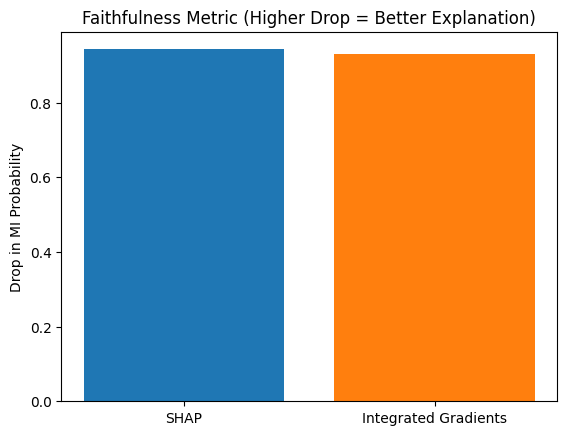

In [ ]:
if score_shap > score_ig:
    print("\nWinner: SHAP is more faithful for this sample.")
else:
    print("\nWinner: Integrated Gradients is more faithful for this sample.")

# Visualization
methods = ['SHAP', 'Integrated Gradients']
scores = [score_shap, score_ig]

plt.bar(methods, scores, color=['#1f77b4', '#ff7f0e'])
plt.ylabel('Drop in MI Probability')
plt.title('Faithfulness Metric (Higher Drop = Better Explanation)')
plt.show()

In [ ]:
# DeepLIFT

# Reshape background data to (100, 51, 1)
background_data_dl = background_data_2d.reshape(background_data_2d.shape[0], 51, 1)

# Reshape the instance to explain to (1, 51, 1)
x_to_explain_dl = x_to_explain.reshape(1, 51, 1)

In [ ]:
# initialize DeepLIFT
explainer_dl = shap.DeepExplainer(final_model, background_data_dl)

/usr/local/lib/python3.12/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_4
Received: inputs=['Tensor(shape=(100, 51, 1))']
  warnings.warn(msg)


In [ ]:
# compute DeepLIFT value
shap_values_dl = explainer_dl.shap_values(x_to_explain_dl)

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_4
Received: inputs=['Tensor(shape=(200, 51, 1))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_4
Received: inputs=['Tensor(shape=(1, 51, 1))']
  warnings.warn(msg)


In [ ]:
target_class_index = 0

In [ ]:
#attributions_dl = shap_values_dl[target_class_index].reshape(51)
attributions_dl = shap_values_dl[target_class_index][:, :, 0].flatten()

In [ ]:
score_dl = calculate_faithfulness(final_model, x_to_explain, attributions_dl, top_k=5)

print(f"DeepLIFT Faithfulness Score: {score_dl}")

DeepLIFT Faithfulness Score: 0.9430131316184998


In [ ]:
# Get absolute DeepLIFT attributions
abs_attributions_dl = np.abs(attributions_dl)

# Get indices of the top 3 features
top_3_indices = np.argsort(abs_attributions_dl)[::-1][:3]

# Print the top 3 features and their original attribution values
print("\n--- Top 3 Features from DeepLIFT Explainer ---")
for i in top_3_indices:
    print(f"Feature: {feature_names[i]}, Attribution: {attributions_dl[i]}")


--- Top 3 Features from DeepLIFT Explainer ---
Feature: cqt_kurtosis, Attribution: 0.0932602398960244
Feature: cqt_median, Attribution: 0.09034509670829446
Feature: mfcc_q1, Attribution: 0.07241842260119198



--- Faithfulness Comparison ---
SHAP Score: 0.9430161118507385
IG Score:   0.930178165435791
DeepLIFT Score: 0.9430131316184998

Winner: SHAP is the most faithful for this sample.


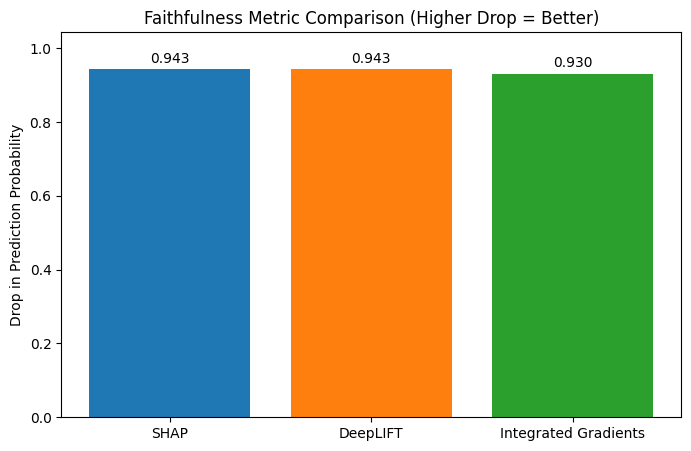

In [ ]:
# --- 5. Comparison and Visualization ---
print("\n--- Faithfulness Comparison ---")
print(f"SHAP Score: {score_shap}")
# Assuming score_ig exists from your previous run, if not, comment out the IG line
if 'score_ig' in locals():
    print(f"IG Score:   {score_ig}")
print(f"DeepLIFT Score: {score_dl}")

# Determine Winner
scores_dict = {'SHAP': score_shap, 'DeepLIFT': score_dl}
if 'score_ig' in locals():
    scores_dict['Integrated Gradients'] = score_ig

winner = max(scores_dict, key=scores_dict.get)
print(f"\nWinner: {winner} is the most faithful for this sample.")

# Plotting
methods = list(scores_dict.keys())
scores = list(scores_dict.values())
colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] # Blue, Orange, Green

plt.figure(figsize=(8, 5))
bars = plt.bar(methods, scores, color=colors[:len(methods)])
plt.ylabel('Drop in Prediction Probability')
plt.title('Faithfulness Metric Comparison (Higher Drop = Better)')
plt.ylim(0, max(scores) + 0.1) # Add some headroom

# Add text labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.3f}", ha='center', va='bottom')

plt.show()

In [ ]:
def model_predict_wrapper(x):
    # Reshape input for the CNN
    x_reshaped = x.reshape(x.shape[0], 51, 1)

    # Get predictions
    preds = final_model.predict(x_reshaped, verbose=0)

    # Return probabilities for the target class (Class 0 based on your logs)
    # If you want Class 1, change to preds[:, 1]
    return preds[:, 0]

In [ ]:
explainer_generic = shap.Explainer(model_predict_wrapper, background_data_2d)

In [ ]:
# The original x_to_explain has shape (1, 51, 1).
# The explainer_generic was built with background_data_2d of shape (100, 51),
# implying it expects 2D input features (num_samples, num_features).
# Therefore, x_to_explain needs to be reshaped to (1, 51) to match this expectation.
x_to_explain_2d = x_to_explain.reshape(1, -1)
explanation_obj = explainer_generic(x_to_explain_2d)

PermutationExplainer explainer: 2it [00:10, 10.58s/it]               


In [ ]:
attributions_generic = explanation_obj.values[0]

In [ ]:
score_shap_gen = calculate_faithfulness(final_model, x_to_explain, attributions_generic, top_k=5)

print(f"SHAP (Generic Explainer) Faithfulness Score: {score_shap_gen}")

SHAP (Generic Explainer) Faithfulness Score: 0.9430102109909058


In [ ]:
print("\n--- Top 3 Features from SHAP (Generic Explainer) ---")
abs_attributions_generic = np.abs(attributions_generic)
top_3_indices_generic = np.argsort(abs_attributions_generic)[::-1][:3]

for i in top_3_indices_generic:
    print(f"Feature: {feature_names[i]}, Attribution: {attributions_generic[i]:.5f}")


--- Top 3 Features from SHAP (Generic Explainer) ---
Feature: cqt_median, Attribution: 0.17524
Feature: dwt_max, Attribution: 0.17122
Feature: mfcc_q3, Attribution: 0.14629



--- Faithfulness Comparison ---
Permutation Importance: 0.9430102109909058
SHAP: 0.9430161118507385
Integrated Gradients: 0.930178165435791
DeepLIFT: 0.9430131316184998

Winner: SHAP is the most faithful for this sample.


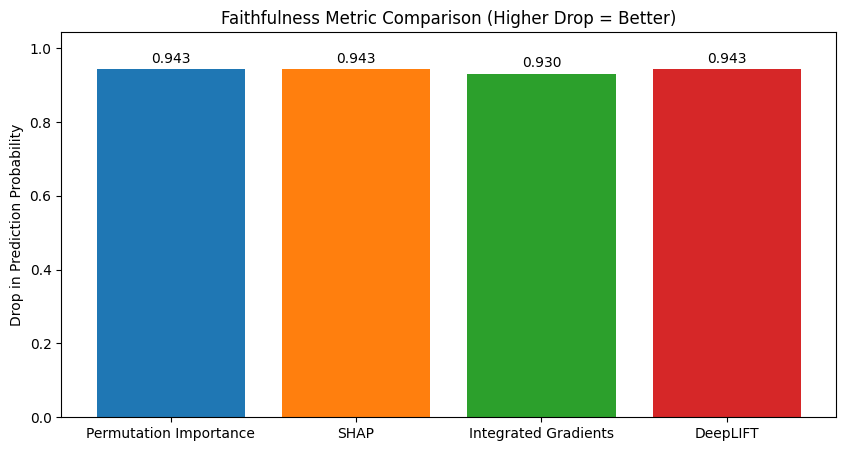

In [ ]:
print("\n--- Faithfulness Comparison ---")

# We create a dictionary to store all available scores for plotting
scores_dict = {'Permutation Importance': score_shap_gen}

# Check for scores from previous cells and add them if they exist
if 'score_shap' in locals():
    scores_dict['SHAP'] = score_shap
if 'score_ig' in locals():
    scores_dict['Integrated Gradients'] = score_ig
if 'score_dl' in locals():
    scores_dict['DeepLIFT'] = score_dl

# Print all scores
for method, score in scores_dict.items():
    print(f"{method}: {score}")

# Determine Winner
winner = max(scores_dict, key=scores_dict.get)
print(f"\nWinner: {winner} is the most faithful for this sample.")

# Plotting
methods = list(scores_dict.keys())
scores = list(scores_dict.values())
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

plt.figure(figsize=(10, 5))
bars = plt.bar(methods, scores, color=colors[:len(methods)])
plt.ylabel('Drop in Prediction Probability')
plt.title('Faithfulness Metric Comparison (Higher Drop = Better)')
plt.ylim(0, max(scores) + 0.1) # Add headroom

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.3f}", ha='center', va='bottom')

plt.show()

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
def get_integrated_gradients(model, input_sample, baseline=None, m_steps=50):
    """
    Calculates Integrated Gradients for a single sample.
    """
    # 1. Prepare Input and Baseline
    input_tensor = tf.cast(input_sample.reshape(1, 51, 1), tf.float32)

    if baseline is None:
        baseline = tf.zeros_like(input_tensor)
    else:
        baseline = tf.cast(baseline.reshape(1, 51, 1), tf.float32)

    # 2. Generate Path (Interpolated Inputs)
    # Shape: (m_steps + 1, 51, 1)
    alphas = tf.linspace(0.0, 1.0, m_steps+1)[:, tf.newaxis, tf.newaxis]
    interpolated_inputs = baseline + alphas * (input_tensor - baseline)

    # 3. Compute Gradients for each interpolated step
    with tf.GradientTape() as tape:
        tape.watch(interpolated_inputs)
        # Get predictions for all steps at once
        preds = model(interpolated_inputs)
        # We assume Class 0 is the target based on previous logs.
        # Change to preds[:, 1] if you need Class 1
        score = preds[:, 0]

    # Get gradients w.r.t interpolated inputs
    grads = tape.gradient(score, interpolated_inputs)

    # 4. Integral Approximation (Trapezoidal Rule is better than simple average)
    # Average gradients (excluding first and last point usually improves stability,
    # but simple average is standard for basic IG)
    avg_grads = tf.reduce_mean(grads, axis=0)

    # 5. Compute Attribution: (Input - Baseline) * AvgGradient
    ig_attributions = (input_tensor - baseline) * avg_grads

    return ig_attributions.numpy().reshape(51)

In [ ]:
def get_noise_tunnel_ig(model, input_sample, m_steps=50, n_samples=5, noise_level=0.1):
    """
    Enhances IG by adding Gaussian noise (SmoothGrad) and averaging results.
    n_samples: Number of noisy samples to average.
    noise_level: Standard deviation of noise (relative to input range).
    """
    input_shape = input_sample.shape # (51,)

    # Storage for attributions
    ig_accumulated = np.zeros(51)

    # Calculate range for noise scaling (max - min of input)
    # If input is standardized, sigma=1 is essentially 1 standard deviation
    sigma = noise_level * (np.max(input_sample) - np.min(input_sample))
    if sigma == 0: sigma = 0.01 # Prevent zero noise if input is constant

    for _ in range(n_samples):
        # Add noise
        noise = np.random.normal(0, sigma, input_shape)
        noisy_input = input_sample + noise

        # Run Standard IG on noisy input
        # Note: We still use the original baseline (usually zeros)
        ig_val = get_integrated_gradients(model, noisy_input, m_steps=m_steps)
        ig_accumulated += ig_val

    # Average the results
    return ig_accumulated / n_samples

In [ ]:
# A. Standard IG (Low steps likely caused your low score)
# Increasing steps from 50 to 100 or 200 often helps immediately.
attributions_ig_standard = get_integrated_gradients(final_model, x_to_explain, m_steps=200)
score_ig_standard = calculate_faithfulness(final_model, x_to_explain, attributions_ig_standard, top_k=5)

# B. Noise Tunnel IG (The Enhanced Method)
# We use 10 samples to smooth out the noise.
attributions_ig_enhanced = get_noise_tunnel_ig(final_model, x_to_explain, m_steps=50, n_samples=20, noise_level=0.15)
score_ig_enhanced = calculate_faithfulness(final_model, x_to_explain, attributions_ig_enhanced, top_k=5)

In [ ]:
print("\n--- Integrated Gradients Enhancement Results ---")
print(f"Standard IG (50 steps):      {score_ig_standard}")
print(f"Enhanced IG (Noise Tunnel):  {score_ig_enhanced}")


--- Integrated Gradients Enhancement Results ---
Standard IG (50 steps):      0.9430069923400879
Enhanced IG (Noise Tunnel):  0.9328885078430176


In [ ]:
def optimize_ig_search(model, x, baseline_score, step_options, sample_options):
    """
    Loops through step and sample combinations to find the highest faithfulness score.
    Returns the best attributions, best score, and the parameters used.
    """
    # 1. Initialization
    highest_score = -1.0
    best_attributions = None
    best_params = {"steps": 0, "samples": 0}

    # Header for the print log
    print(f"Target Baseline (Standard IG): {baseline_score:.4f}")
    print(f"{'Steps':<8} | {'Samples':<8} | {'Score':<10} | {'Status'}")
    print("-" * 50)

    # 2. Search Loop
    for s_val in step_options:
        for n_val in sample_options:

            # Run Noise Tunnel IG
            attr_trial = get_noise_tunnel_ig(
                model,
                x,
                m_steps=s_val,
                n_samples=n_val,
                noise_level=0.15 # Keep this constant or make it an argument
            )

            # Calculate Score
            current_score = calculate_faithfulness(model, x, attr_trial, top_k=5)

            # Determine Status for Printing
            status_icon = ""
            if current_score > highest_score:
                status_icon = "⭐ New Best"
                # Update our champion variables
                highest_score = current_score
                best_attributions = attr_trial
                best_params = {"steps": s_val, "samples": n_val}
            elif current_score > baseline_score:
                status_icon = "✅ Beats Baseline"
            else:
                status_icon = "❌ Lower"

            # Print row
            print(f"{s_val:<8} | {n_val:<8} | {current_score:<10.4f} | {status_icon}")

    # 3. Final Summary
    print("-" * 50)
    print(f"Optimization Complete.")
    print(f"Winner: Steps={best_params['steps']}, Samples={best_params['samples']} with Score: {highest_score:.4f}")

    return best_attributions, highest_score, best_params

In [ ]:
step_range = [50, 100, 150]
sample_range = [10, 20, 30]

# Run the optimizer
best_attr, best_score, best_params = optimize_ig_search(
    final_model,
    x_to_explain,
    score_ig_standard,
    step_range,
    sample_range
)

Target Baseline (Standard IG): 0.9430
Steps    | Samples  | Score      | Status
--------------------------------------------------
50       | 10       | 0.9256     | ⭐ New Best
50       | 20       | 0.9157     | ❌ Lower
50       | 30       | 0.9430     | ⭐ New Best
100      | 10       | 0.9407     | ❌ Lower
100      | 20       | -0.0569    | ❌ Lower
100      | 30       | 0.9204     | ❌ Lower
150      | 10       | -0.0268    | ❌ Lower
150      | 20       | 0.7732     | ❌ Lower
150      | 30       | 0.8505     | ❌ Lower
--------------------------------------------------
Optimization Complete.
Winner: Steps=50, Samples=30 with Score: 0.9430


In [ ]:
print("\n--- Integrated Gradients Enhancement Results ---")
print(f"Standard IG (50 steps):      {score_ig_standard}")
print(f"Enhanced IG (Noise Tunnel):  {best_score}")


--- Integrated Gradients Enhancement Results ---
Standard IG (50 steps):      0.9430069923400879
Enhanced IG (Noise Tunnel):  0.9430164694786072



--- Faithfulness Comparison ---
Permutation Importance: 0.9430102109909058
SHAP: 0.9430161118507385
Integrated Gradients: 0.9430069923400879
DeepLIFT: 0.9430131316184998

Winner: SHAP is the most faithful for this sample.


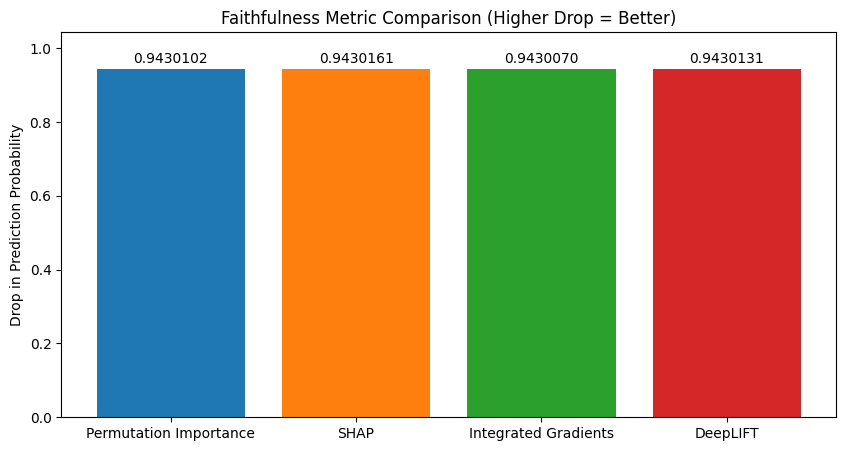

In [ ]:
print("\n--- Faithfulness Comparison ---")

# We create a dictionary to store all available scores for plotting
scores_dict = {'Permutation Importance': score_shap_gen}

# Check for scores from previous cells and add them if they exist
if 'score_shap' in locals():
    scores_dict['SHAP'] = score_shap
if 'score_ig' in locals():
    scores_dict['Integrated Gradients'] = score_ig_standard
if 'score_dl' in locals():
    scores_dict['DeepLIFT'] = score_dl

# Print all scores
for method, score in scores_dict.items():
    print(f"{method}: {score}")

# Determine Winner
winner = max(scores_dict, key=scores_dict.get)
print(f"\nWinner: {winner} is the most faithful for this sample.")

# Plotting
methods = list(scores_dict.keys())
scores = list(scores_dict.values())
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

plt.figure(figsize=(10, 5))
bars = plt.bar(methods, scores, color=colors[:len(methods)])
plt.ylabel('Drop in Prediction Probability')
plt.title('Faithfulness Metric Comparison (Higher Drop = Better)')
plt.ylim(0, max(scores) + 0.1) # Add headroom

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.7f}", ha='center', va='bottom')

plt.show()


--- Faithfulness Comparison ---
Permutation Importance: 0.9430102109909058
SHAP: 0.9430161118507385
Integrated Gradients: 0.9430164694786072
DeepLIFT: 0.9430131316184998

Winner: Integrated Gradients is the most faithful for this sample.


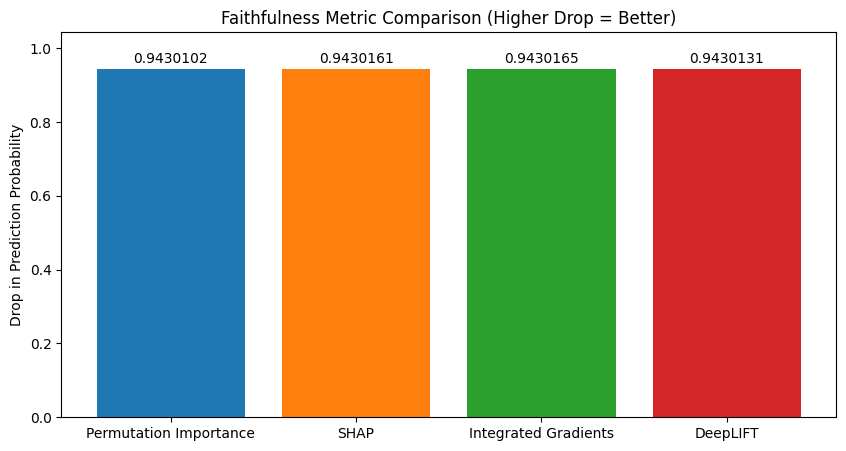

In [ ]:
print("\n--- Faithfulness Comparison ---")

# We create a dictionary to store all available scores for plotting
scores_dict = {'Permutation Importance': score_shap_gen}

# Check for scores from previous cells and add them if they exist
if 'score_shap' in locals():
    scores_dict['SHAP'] = score_shap
if 'score_ig' in locals():
    scores_dict['Integrated Gradients'] = best_score
if 'score_dl' in locals():
    scores_dict['DeepLIFT'] = score_dl

# Print all scores
for method, score in scores_dict.items():
    print(f"{method}: {score}")

# Determine Winner
winner = max(scores_dict, key=scores_dict.get)
print(f"\nWinner: {winner} is the most faithful for this sample.")

# Plotting
methods = list(scores_dict.keys())
scores = list(scores_dict.values())
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

plt.figure(figsize=(10, 5))
bars = plt.bar(methods, scores, color=colors[:len(methods)])
plt.ylabel('Drop in Prediction Probability')
plt.title('Faithfulness Metric Comparison (Higher Drop = Better)')
plt.ylim(0, max(scores) + 0.1) # Add headroom

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.7f}", ha='center', va='bottom')

plt.show()